In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\sarah\\Desktop\\포스코 아카데미\\새 폴더\\전체강의자료\\Part 05~11) Machine Learning\\06. 회귀분석\\실습코드'

In [3]:
# 데이터 불러오기
corolla = pd.read_csv("../Data/part2_data/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
# 데이터 수와 변수의 수 확인하기
nCar=corolla.shape[0]
nVar=corolla.shape[1]
print(nCar, nVar)

1436 37


## 범주형 변수를 이진형 변수로 변환

In [5]:
## 가변수 생성
corolla.Fuel_Type.unique()
dummy_p=np.repeat(0, nCar)
dummy_d=np.repeat(0, nCar)
dummy_c=np.repeat(0, nCar)

In [6]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
p_idx=np.array(corolla.Fuel_Type=="Petrol")
d_idx=np.array(corolla.Fuel_Type=="Diesel")
c_idx=np.array(corolla.Fuel_Type=="CNG")

In [8]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [9]:
dummy_p[p_idx]=1
dummy_d[d_idx]=1
dummy_c[c_idx]=1

In [10]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

## 불필요한 변수 제거 및 가변수 추가


In [11]:
Fuel=pd.DataFrame({'Petrol':dummy_p, 'Diesel':dummy_d, 'CNG':dummy_c})

In [12]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [13]:
corolla_=corolla.drop(['Id', "Model", "Fuel_Type"], axis=1, inplace=False)
mlr_data=pd.concat((corolla_, Fuel), 1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [14]:
# bias 추가
mlr_data=sm.add_constant(mlr_data, has_constant="add")
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [15]:
feature_columns=list(mlr_data.columns.difference(['Price']))
X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [16]:
# Train the MLR / 회귀모델적합
full_model=sm.OLS(train_y, train_x)
fitted_full_model=full_model.fit()

In [17]:
 ## R2가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     304.6
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:32:44   Log-Likelihood:                -8438.6
No. Observations:                1005   AIC:                         1.695e+04
Df Residuals:                     971   BIC:                         1.711e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -279.6073    135.954     -2.057      0.040    -546.405     -12.810
Age_08_04         -121.2887      4.075    -29.763      0.000    -129.286    -113.292
Airbag_1           -38.4123    267.169     -0.144      0.886    -562.708     485.883
Airbag_2          -142.7966    139.872     -1.021      0.308    -417.284     131.691
Airco              227.5122     96.456      2.359      0.019      38.226     416.798
Automatic          519.1592    159.829      3.248      0.001     205.510     832.808
Automatic_airco   2457.6675    200.363     12.266      0.000    2064.473    2850.862
BOVAG_Guarantee    594.4945    137.148      4.335      0.000     325.354     863.635
Backseat_Divider  -197.3297    135.331     -1.458      0.145    -462.905      68.246
Boardcomputer     -261.6780    124.348     -2.104      0.036    -505.699     -17.657
CD_Player          195.4357    105.211      1.858      0.064     -11.031     401.903
CNG              -1864.9715    265.723     -7.018      0.000   -2386.430   -1343.513
Central_Lock      -227.3350    155.109     -1.466      0.143    -531.723      77.053
Cylinders           -0.0286      0.002    -12.111      0.000      -0.033      -0.024
Diesel            2010.6111    311.629      6.452      0.000    1399.068    2622.154
Doors              100.8895     41.728      2.418      0.016      19.002     182.777
Gears                1.2397    195.764      0.006      0.995    -382.930     385.409
Guarantee_Period    78.7355     15.953      4.935      0.000      47.428     110.042
HP                  53.6284      5.770      9.294      0.000      42.305      64.952
KM                  -0.0153      0.001    -11.531      0.000      -0.018      -0.013
Met_Color           53.3725     78.580      0.679      0.497    -100.833     207.578
Metallic_Rim       242.1830     99.865      2.425      0.015      46.207     438.159
Mfg_Month         -103.4471     10.771     -9.604      0.000    -124.584     -82.311
Mfg_Year             4.4118      0.866      5.095      0.000       2.712       6.111
Mfr_Guarantee      208.6232     77.092      2.706      0.007      57.337     359.909
Mistlamps           12.9138    114.223      0.113      0.910    -211.238     237.066
Petrol            -145.6467    238.751     -0.610      0.542    -614.174     322.880
Power_Steering     131.8110    315.124      0.418      0.676    -486.591     750.213
Powered_Windows    600.5525    155.374      3.865      0.000     295.645     905.460
Quarterly_Tax       11.4500      1.929      5.934      0.000       7.664      15.236
Radio              851.3972    794.891      1.071      0.284    -708.505    2411.300
Radio_cassette    -863.7546    795.883     -1.085      0.278   -2425.604     698.095
Sport_Model        305.5514     90.711      3.368      0.001     127.539     483.564
Tow_Bar           -115.

## VIF를 통한 다중공선성 확인 

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

C:\Users\sarah\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\sarah\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


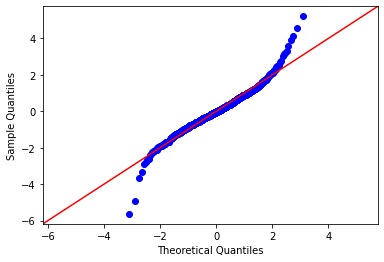

In [19]:
# 학습데이터의 잔차 확인
res=fitted_full_model.resid
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

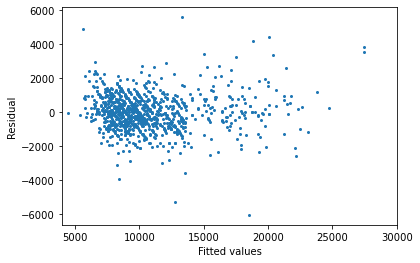

In [20]:
# residual pattern 확인
pred_y=fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [21]:
 ## 검증 데이터에 대한 예측 
pred_y2=fitted_full_model.predict(test_x)

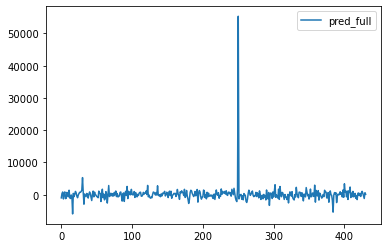

In [22]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
## MSE 성능
mean_squared_error(y_true=test_y, y_pred=pred_y2)

8331304.5862355

# 변수선택법

In [25]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029C35940E50>, 'AIC': 19123.191162456173}


In [26]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x29c35940700>,
 'AIC': 16945.172837679977}

In [27]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 1.380307674407959 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17494.4
Name: 211, dtype: object


In [28]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [29]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.265289306640625 seconds.
Processed  630 models on 2 predictors in 1.2855639457702637 seconds.
Processed  7140 models on 3 predictors in 15.789778470993042 seconds.
Total elapsed time: 17.594948768615723 seconds.


In [30]:
models

,AIC,model
1,17738.551894,<statsmodels.regression.linear_model.Regressio...
2,17494.401811,<statsmodels.regression.linear_model.Regressio...
3,17365.948527,<statsmodels.regression.linear_model.Regressio...


In [31]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     2014.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:33:05   Log-Likelihood:                -8679.0
No. Observations:                1005   AIC:                         1.737e+04
Df Residuals:                    1001   BIC:                         1.739e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0216      0.001    -15.802      0.000      -0.024      -0.019
Mfg_Year    1552.3263     37.856     41.006      0.000    1478.041    1626.612
Weight        17.1211      0.957     17.899      0.000      15.244      18.998
const       -3.11e+06   7.52e+04    -41.349      0.000   -3.26e+06   -2.96e+06
==============================================================================
Omnibus:                      168.432   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2096.637
Skew:                          -0.329   Prob(JB):                         0.00
Kurtosis:                      10.045   Cond. No.                     1.36e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.91192
full model AIC:  16945.17284
full model MSE:  13070304.77480
selected model Rsquared:  0.85789
selected model AIC:  17365.94853
selected model MSE:  13070304.77480


Text(0, 0.5, 'BIC')

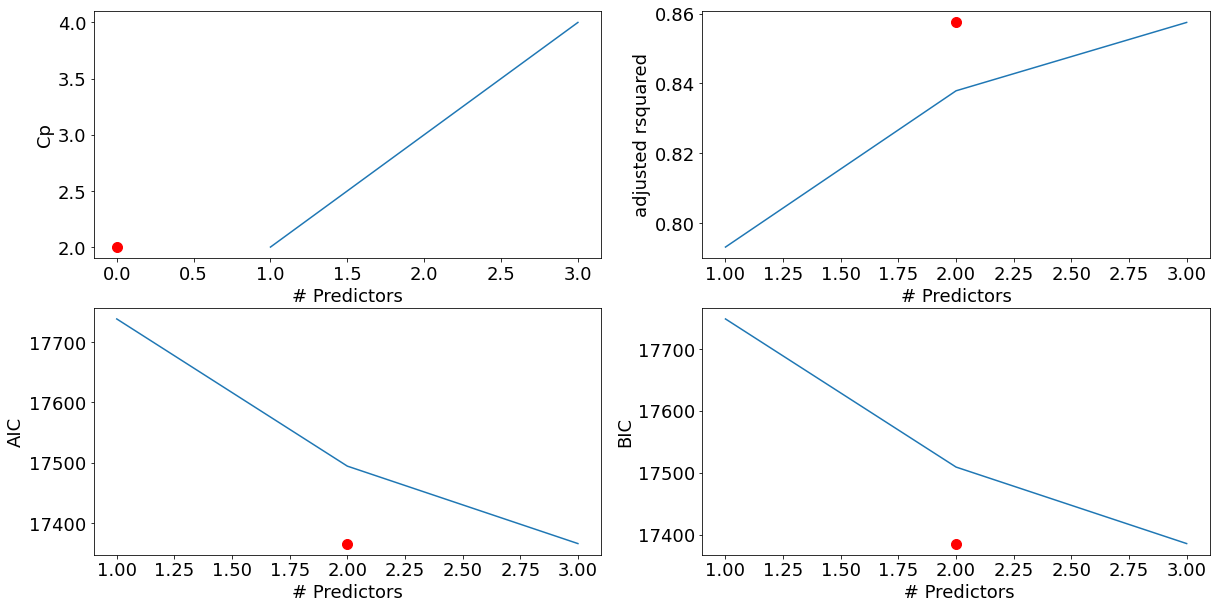

In [33]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [34]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [35]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [36]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.12266993522644043
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029C68B5B4C0>
Processed  35 models on 2 predictors in 0.08577299118041992
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029C36F55280>
Processed  34 models on 3 predictors in 0.06981134414672852
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029C68B3E790>
Processed  33 models on 4 predictors in 0.09275197982788086
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029C68B45340>
Processed  32 models on 5 predictors in 0.07679152488708496
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP'

In [37]:
Forward_best_model.aic

16931.90104933756

In [38]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     438.4
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:33:08   Log-Likelihood:                -8442.0
No. Observations:                1005   AIC:                         1.693e+04
Df Residuals:                     981   BIC:                         1.705e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1242.7441    127.907      9.716      0.000     991.741    1493.747
Automatic_airco   2482.5462    188.030     13.203      0.000    2113.558    2851.534
HP                  53.9267      5.679      9.495      0.000      42.782      65.071
Weight               7.8902      1.231      6.407      0.000       5.474      10.307
KM                  -0.0153      0.001    -11.666      0.000      -0.018      -0.013
Powered_Windows    432.5958     86.614      4.995      0.000     262.625     602.566
Quarterly_Tax       10.7504      1.863      5.770      0.000       7.094      14.406
Guarantee_Period    80.6168     15.600      5.168      0.000      50.004     111.229
BOVAG_Guarantee    596.9124    134.672      4.432      0.000     332.634     861.191
cc                  -3.9058      0.545     -7.171      0.000      -4.975      -2.837
Diesel            3908.3015    521.513      7.494      0.000    2884.892    4931.711
Petrol            1658.3624    392.151      4.229      0.000     888.811    2427.914
Boardcomputer     -280.4382    122.847     -2.283      0.023    -521.511     -39.365
Mfr_Guarantee      213.8429     75.870      2.819      0.005      64.957     362.729
Automatic          500.9148    158.587      3.159      0.002     189.705     812.124
ABS               -356.3594    102.769     -3.468      0.001    -558.032    -154.687
Sport_Model        303.3059     86.905      3.490      0.001     132.765     473.847
Airco              208.1984     91.274      2.281      0.023      29.083     387.314
Doors               95.9184     40.718      2.356      0.019      16.014     175.823
Metallic_Rim       240.2910     94.403      2.545      0.011      55.037     425.545
CD_Player          202.6177    101.340      1.999      0.046       3.750     401.485
Backseat_Divider  -220.4316    123.353     -1.787      0.074    -462.497      21.634
Age_08_04          -18.1637     10.577     -1.717      0.086     -38.919       2.592
const            -2.484e+06   2.56e+05     -9.697      0.000   -2.99e+06   -1.98e+06
==============================================================================
Omnibus:                       86.313   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              460.459
Skew:                           0.137   Prob(JB):                    1.03e-100
Kurtosis:                       6.305   Cond. No.                     5.82e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 후진소거법

In [39]:
######## 후진소거법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [40]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [41]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.2902209758758545
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029C36F576D0>
Processed  35 models on 34 predictors in 0.15358829498291016
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 

In [42]:
Backward_best_model.aic

16931.901049337597

In [52]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     438.4
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:11:50   Log-Likelihood:                -8442.0
No. Observations:                1005   AIC:                         1.693e+04
Df Residuals:                     981   BIC:                         1.705e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -356.3594    102.769     -3.468      0.001    -558.032    -154.687
Age_08_04          -18.1637     10.577     -1.717      0.086     -38.919       2.592
Airco              208.1984     91.274      2.281      0.023      29.083     387.314
Automatic          500.9148    158.587      3.159      0.002     189.705     812.124
Automatic_airco   2482.5462    188.030     13.203      0.000    2113.558    2851.534
BOVAG_Guarantee    596.9124    134.672      4.432      0.000     332.634     861.191
Backseat_Divider  -220.4316    123.353     -1.787      0.074    -462.497      21.634
Boardcomputer     -280.4382    122.847     -2.283      0.023    -521.511     -39.365
CD_Player          202.6177    101.340      1.999      0.046       3.750     401.485
CNG              -1658.3624    392.151     -4.229      0.000   -2427.914    -888.811
Cylinders        -5.842e+05   6.03e+04     -9.690      0.000   -7.02e+05   -4.66e+05
Diesel            2249.9390    479.795      4.689      0.000    1308.396    3191.482
Doors               95.9184     40.718      2.356      0.019      16.014     175.823
Guarantee_Period    80.6168     15.600      5.168      0.000      50.004     111.229
HP                  53.9267      5.679      9.495      0.000      42.782      65.071
KM                  -0.0153      0.001    -11.666      0.000      -0.018      -0.013
Metallic_Rim       240.2910     94.403      2.545      0.011      55.037     425.545
Mfg_Year          1242.7441    127.907      9.716      0.000     991.741    1493.747
Mfr_Guarantee      213.8429     75.870      2.819      0.005      64.957     362.729
Powered_Windows    432.5958     86.614      4.995      0.000     262.625     602.566
Quarterly_Tax       10.7504      1.863      5.770      0.000       7.094      14.406
Sport_Model        303.3059     86.905      3.490      0.001     132.765     473.847
Weight               7.8902      1.231      6.407      0.000       5.474      10.307
cc                  -3.9058      0.545     -7.171      0.000      -4.975      -2.837
const             -1.46e+05   1.51e+04     -9.690      0.000   -1.76e+05   -1.16e+05
==============================================================================
Omnibus:                       86.313   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              460.459
Skew:                           0.137   Prob(JB):                    1.03e-100
Kurtosis:                       6.305   Cond. No.                     4.03e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.77e-29. This might indicate that there are
strong multicollinearity problems or that the desi

# 단계적 선택법

In [43]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [44]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.1107029914855957
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029C36F816D0>
forward
Processed  1 models on 0 predictors in 0.002992391586303711
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029C36F674F0>
Processed  35 models on 2 predictors in 0.0827786922454834
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029C391280A0>
forward
Processed  2 models on 1 predictors in 0.00598454475402832
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029C36F57AC0>
Processed  34 models on 3 predictors in 0.07280802726745605
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.Regre

Processed  21 models on 16 predictors in 0.07280731201171875
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'cc', 'Diesel', 'Petrol', 'Boardcomputer', 'Mfr_Guarantee', 'Automatic', 'ABS', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029C36F6CF40>
forward
Processed  16 models on 15 predictors in 0.0468754768371582
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'cc', 'Diesel', 'Petrol', 'Boardcomputer', 'Mfr_Guarantee', 'Automatic', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029C39128E80>
Processed  20 models on 17 predictors in 0.06183481216430664
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guara

Processed  24 models on 23 predictors in 0.09474635124206543
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'cc', 'Diesel', 'Petrol', 'Boardcomputer', 'Mfr_Guarantee', 'Automatic', 'ABS', 'Sport_Model', 'Airco', 'Doors', 'Metallic_Rim', 'CD_Player', 'Backseat_Divider', 'Age_08_04', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029C36F6C430>
backward
Processed  13 models on 24 predictors in 0.044879913330078125
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'cc', 'Diesel', 'Petrol', 'Boardcomputer', 'Mfr_Guarantee', 'Automatic', 'ABS', 'Sport_Model', 'Airco', 'Doors', 'Metallic_Rim', 'CD_Player', 'Backseat_Divider', 'Age_08_04', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029C3

Processed  13 models on 24 predictors in 0.05680966377258301
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'cc', 'Diesel', 'Petrol', 'Boardcomputer', 'Mfr_Guarantee', 'Automatic', 'ABS', 'Sport_Model', 'Airco', 'Doors', 'Metallic_Rim', 'CD_Player', 'Backseat_Divider', 'Age_08_04', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029C39129B80>
forward
Processed  24 models on 23 predictors in 0.07779216766357422
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'cc', 'Diesel', 'Petrol', 'Boardcomputer', 'Mfr_Guarantee', 'Automatic', 'ABS', 'Sport_Model', 'Airco', 'Doors', 'Metallic_Rim', 'CD_Player', 'Backseat_Divider', 'Age_08_04', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029C36F

In [45]:
Stepwise_best_model.aic

16931.90104933756

# 성능평가 

In [46]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(24,) (25,) (24,)


In [47]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [48]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [49]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [50]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

             ALL      FORWARD     BACKWARD     STEPWISE
MSE   8.3313e+06  8.59899e+06  8.59899e+06  8.59899e+06
RMSE      2886.4       2932.4       2932.4       2932.4
MAE      943.486      940.779      940.779      940.779
MAPE     8.91683      8.87563      8.87563      8.87563


In [51]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
24
25
24
